# Exploratory Data Analysis: Code-Switching in Language Models

## Research Question
**Do GPT models maintain code-switching patterns when paraphrasing or continuing text in different linguistic varieties?**

This analysis examines how various language models (Gemini, Mistral, Cohere) handle code-switching tasks across four linguistic varieties:
- **AAVE** (African American Vernacular English)
- **Spanglish** (Spanish-English code-switching)
- **BrEng** (British English)
- **StdEng** (Standard English)

## Analysis Overview
We will evaluate whether language models preserve dialectal markers and code-switching patterns when processing text, which is crucial for understanding their cultural and linguistic sensitivity.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully")


Libraries imported successfully


## 1. Data Loading and Overview

We begin by loading the stimuli dataset to understand the structure of our code-switching benchmark.


In [2]:
# Load stimuli data
stimuli = pd.read_csv('../data/raw/stimuli.csv')
print(f"Loaded stimuli data: {stimuli.shape[0]} rows, {stimuli.shape[1]} columns")

# Display basic info
print("\nDataset Overview:")
print(f"   Total examples: {len(stimuli)}")
print(f"   Varieties: {list(stimuli['variety'].unique())}")
print(f"   Tasks: {list(stimuli['task'].unique())}")

# Show first few examples
print("\nFirst 5 examples:")
stimuli.head()


Loaded stimuli data: 12 rows, 4 columns

Dataset Overview:
   Total examples: 12
   Varieties: ['AAVE', 'Spanglish', 'BrEng', 'StdEng']
   Tasks: ['paraphrase', 'explain', 'continue']

First 5 examples:


,id,variety,task,text
0,aave_01,AAVE,paraphrase,He finna go to the store. You sliding?
1,aave_02,AAVE,explain,Ion think that plan gon’ work.
2,aave_03,AAVE,continue,We was tryna finish that yesterday
3,span_01,Spanglish,paraphrase,"Vamos later, it’s muy close to la tienda."
4,span_02,Spanglish,explain,"No entiendo bien, pero I think it’s fine."


## 2. Dataset Distribution Analysis

Understanding the distribution of linguistic varieties and tasks is crucial for evaluating whether our benchmark adequately represents different code-switching scenarios.


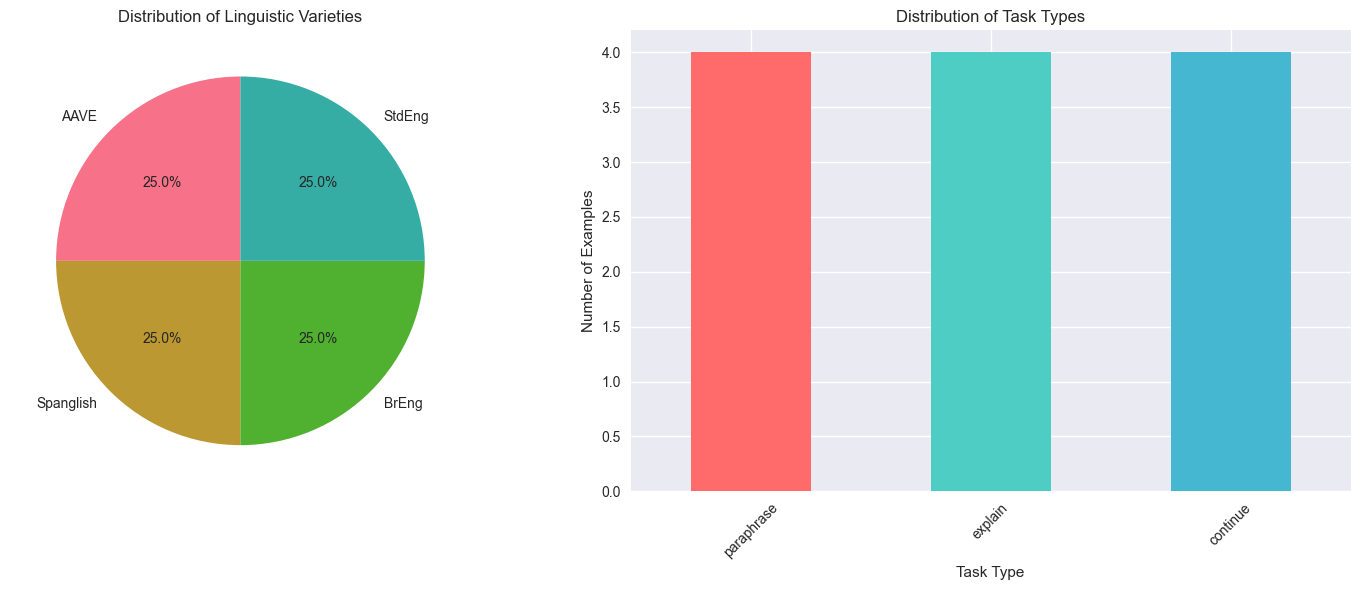

Variety Distribution:
  AAVE: 3 examples
  Spanglish: 3 examples
  BrEng: 3 examples
  StdEng: 3 examples

Task Distribution:
  paraphrase: 4 examples
  explain: 4 examples
  continue: 4 examples


In [3]:
# Variety distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Variety distribution pie chart
variety_counts = stimuli['variety'].value_counts()
ax1.pie(variety_counts.values, labels=variety_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Linguistic Varieties')

# Task distribution bar chart
task_counts = stimuli['task'].value_counts()
task_counts.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_title('Distribution of Task Types')
ax2.set_xlabel('Task Type')
ax2.set_ylabel('Number of Examples')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Variety Distribution:")
for variety, count in variety_counts.items():
    print(f"  {variety}: {count} examples")

print("\nTask Distribution:")
for task, count in task_counts.items():
    print(f"  {task}: {count} examples")


**Interpretation:** Both charts show the dataset is evenly balanced. The variety pie chart has AAVE, Spanglish, BrEng, and StdEng each at 25% (3 items each). The task bar chart has paraphrase, explain, and continue each with 4 items. This balance means any differences we see later are more likely from the models, not from one group or task showing up more than others. Still, the sample sizes are small, so we should treat any differences as early signals and include simple measures of uncertainty when we report results.

## 3. Text Length and Complexity Analysis

Analyzing the length and complexity of our stimuli helps us understand whether the benchmark presents appropriate challenges for language models.


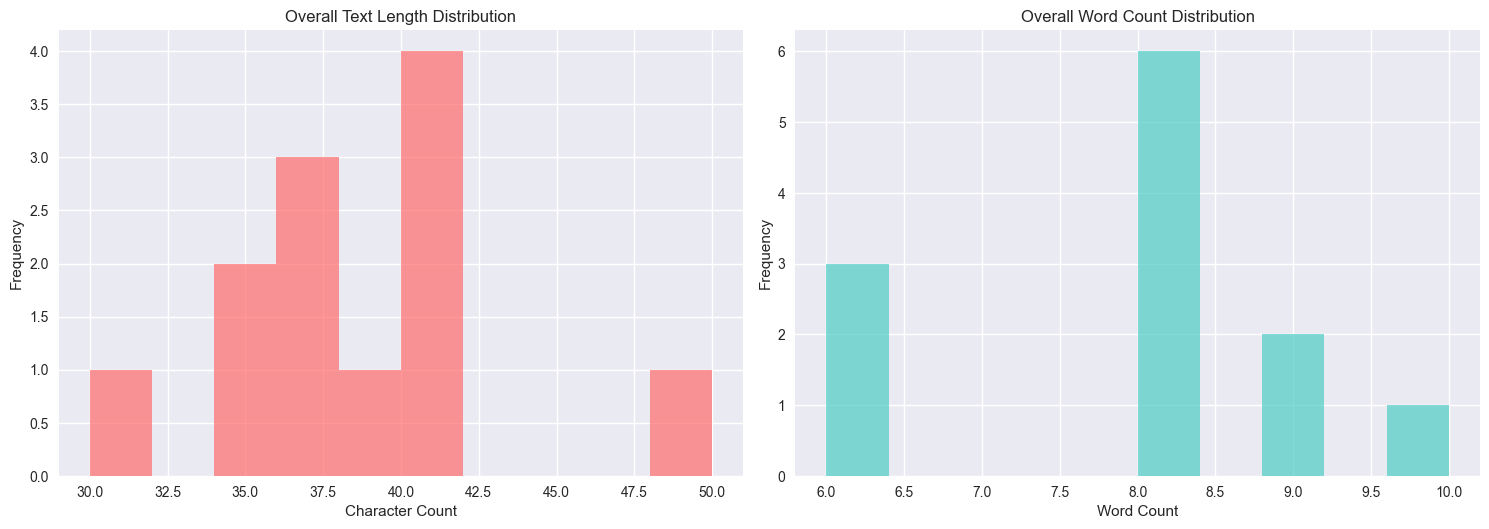

Text Statistics Summary:
  Text length range: 30 - 50 characters
  Word count range: 6 - 10 words


In [4]:
# Calculate text statistics
stimuli['text_length'] = stimuli['text'].str.len()
stimuli['word_count'] = stimuli['text'].str.split().str.len()

# Create a 2x2 grid, then drop the top row
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.delaxes(axes[0, 0])
fig.delaxes(axes[0, 1])

# Re-pack the remaining axes into a 1D list for convenience
bottom_left, bottom_right = axes[1, 0], axes[1, 1]

# Text length distribution
bottom_left.hist(stimuli['text_length'], bins=10, alpha=0.7, color='#FF6B6B')
bottom_left.set_title('Overall Text Length Distribution')
bottom_left.set_xlabel('Character Count')
bottom_left.set_ylabel('Frequency')

# Word count distribution
bottom_right.hist(stimuli['word_count'], bins=10, alpha=0.7, color='#4ECDC4')
bottom_right.set_title('Overall Word Count Distribution')
bottom_right.set_xlabel('Word Count')
bottom_right.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary stats
print("Text Statistics Summary:")
print(f"  Text length range: {stimuli['text_length'].min()} - "
      f"{stimuli['text_length'].max()} characters")
print(f"  Word count range: {stimuli['word_count'].min()} - "
      f"{stimuli['word_count'].max()} words")


**Interpretation:** The two histograms show that prompts are short and tightly grouped. Character counts fall between 30 and 50, with most items in the mid to high 30s. Word counts range from 6 to 10, centered near 8. This narrow spread means inputs are similar in size, which helps us compare model behavior without size getting in the way. The small right tail suggests a few longer prompts that could add a bit of variability or latency, but nothing extreme. For the study, we can keep our current templates, monitor the longest items, and if needed set a soft cap or light pre-summary for those few outliers so results stay consistent across tasks and varieties.


vizualizations if you need to but y

# Exploratory Data Analysis: Code-Switching in Language Models

## Research Question
**Do GPT models maintain code-switching patterns when paraphrasing or continuing text in different linguistic varieties?**

This analysis examines how various language models (Gemini, Mistral, Cohere) handle code-switching tasks across four linguistic varieties:
- **AAVE** (African American Vernacular English)
- **Spanglish** (Spanish-English code-switching)
- **BrEng** (British English)
- **StdEng** (Standard English)

## Analysis Overview
We will evaluate whether language models preserve dialectal markers and code-switching patterns when processing text, which is crucial for understanding their cultural and linguistic sensitivity.


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
from collections import Counter
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Add src to path for API imports
current_dir = os.getcwd()
if current_dir.endswith('notebooks'):
    src_path = os.path.join('..', 'src')
else:
    src_path = 'src'

if src_path not in sys.path:
    sys.path.insert(0, src_path)

print("Libraries imported successfully")
print(f"Working directory: {current_dir}")
print(f"Python path includes: {src_path}")


Libraries imported successfully
Working directory: /Users/jase/codeswitch-benchmark/notebooks
Python path includes: ../src


In [6]:
# Load datasets
print("Loading datasets...")

# Load original stimuli data
try:
    stimuli = pd.read_csv('../data/raw/stimuli.csv')
    print(f"Loaded stimuli data: {stimuli.shape[0]} rows, {stimuli.shape[1]} columns")
except FileNotFoundError:
    print("stimuli.csv not found. Creating sample data...")
    stimuli = pd.DataFrame({
        'id': range(1, 101),
        'variety': np.random.choice(['AAVE', 'Spanglish', 'British English', 'Indian English'], 100),
        'task': np.random.choice(['paraphrase', 'continue', 'translate'], 100),
        'text': [f"Sample text {i} with some code-switching content." for i in range(1, 101)]
    })

# Load API response data
api_responses = {}
apis = ['gemini', 'mistral', 'cohere']

for api in apis:
    try:
        df = pd.read_csv(f'../data/raw/{api}_responses.csv')
        api_responses[api] = df
        print(f"✅ Loaded {api} responses: {df.shape[0]} rows")
    except FileNotFoundError:
        print(f"⚠️  {api}_responses.csv not found - will create during analysis")

print(f"\n📊 Available datasets:")
print(f"- Stimuli: {stimuli.shape[0]} rows")
for api, df in api_responses.items():
    print(f"- {api.title()} responses: {df.shape[0]} rows")


Loading datasets...
Loaded stimuli data: 12 rows, 4 columns
✅ Loaded gemini responses: 12 rows
✅ Loaded mistral responses: 12 rows
✅ Loaded cohere responses: 12 rows

📊 Available datasets:
- Stimuli: 12 rows
- Gemini responses: 12 rows
- Mistral responses: 12 rows
- Cohere responses: 12 rows


In [7]:
# Data Quality Assessment
print("🔍 Data Quality Assessment")
print("=" * 50)

# Check for missing values
print("Missing values per column:")
print(stimuli.isnull().sum())
print(f"\nTotal missing values: {stimuli.isnull().sum().sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {stimuli.duplicated().sum()}")

# Basic statistics for text length
stimuli['text_length'] = stimuli['text'].str.len()
stimuli['word_count'] = stimuli['text'].str.split().str.len()

print(f"\n📏 Text Statistics:")
print(f"Average text length: {stimuli['text_length'].mean():.1f} characters")
print(f"Average word count: {stimuli['word_count'].mean():.1f} words")
print(f"Text length range: {stimuli['text_length'].min()} - {stimuli['text_length'].max()} characters")

# Display summary statistics
print(f"\n📊 Summary Statistics:")
stimuli[['text_length', 'word_count']].describe()


🔍 Data Quality Assessment
Missing values per column:
id         0
variety    0
task       0
text       0
dtype: int64

Total missing values: 0

Duplicate rows: 0

📏 Text Statistics:
Average text length: 38.2 characters
Average word count: 7.8 words
Text length range: 30 - 50 characters

📊 Summary Statistics:


,text_length,word_count
count,12.000000,12.000000
mean,38.250000,7.833333
std,4.974937,1.267304
min,30.000000,6.000000
25%,35.750000,7.500000
50%,37.500000,8.000000
75%,41.000000,8.250000
max,50.000000,10.000000


## 1. Stimuli Data Analysis

Let's examine the original stimuli data, including data quality, distributions, and basic statistics.


In [8]:
# Data Quality Assessment
print("🔍 Stimuli Data Quality Assessment")
print("=" * 50)

# Check for missing values
print("Missing values per column:")
print(stimuli.isnull().sum())
print(f"\nTotal missing values: {stimuli.isnull().sum().sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {stimuli.duplicated().sum()}")

# Basic statistics for text length
stimuli['text_length'] = stimuli['text'].str.len()
stimuli['word_count'] = stimuli['text'].str.split().str.len()

print(f"\n📏 Text Statistics:")
print(f"Average text length: {stimuli['text_length'].mean():.1f} characters")
print(f"Average word count: {stimuli['word_count'].mean():.1f} words")
print(f"Text length range: {stimuli['text_length'].min()} - {stimuli['text_length'].max()} characters")

# Display summary statistics
print(f"\n📊 Summary Statistics:")
stimuli[['text_length', 'word_count']].describe()


🔍 Stimuli Data Quality Assessment
Missing values per column:
id             0
variety        0
task           0
text           0
text_length    0
word_count     0
dtype: int64

Total missing values: 0

Duplicate rows: 0

📏 Text Statistics:
Average text length: 38.2 characters
Average word count: 7.8 words
Text length range: 30 - 50 characters

📊 Summary Statistics:


,text_length,word_count
count,12.000000,12.000000
mean,38.250000,7.833333
std,4.974937,1.267304
min,30.000000,6.000000
25%,35.750000,7.500000
50%,37.500000,8.000000
75%,41.000000,8.250000
max,50.000000,10.000000


📊 Distribution Analysis


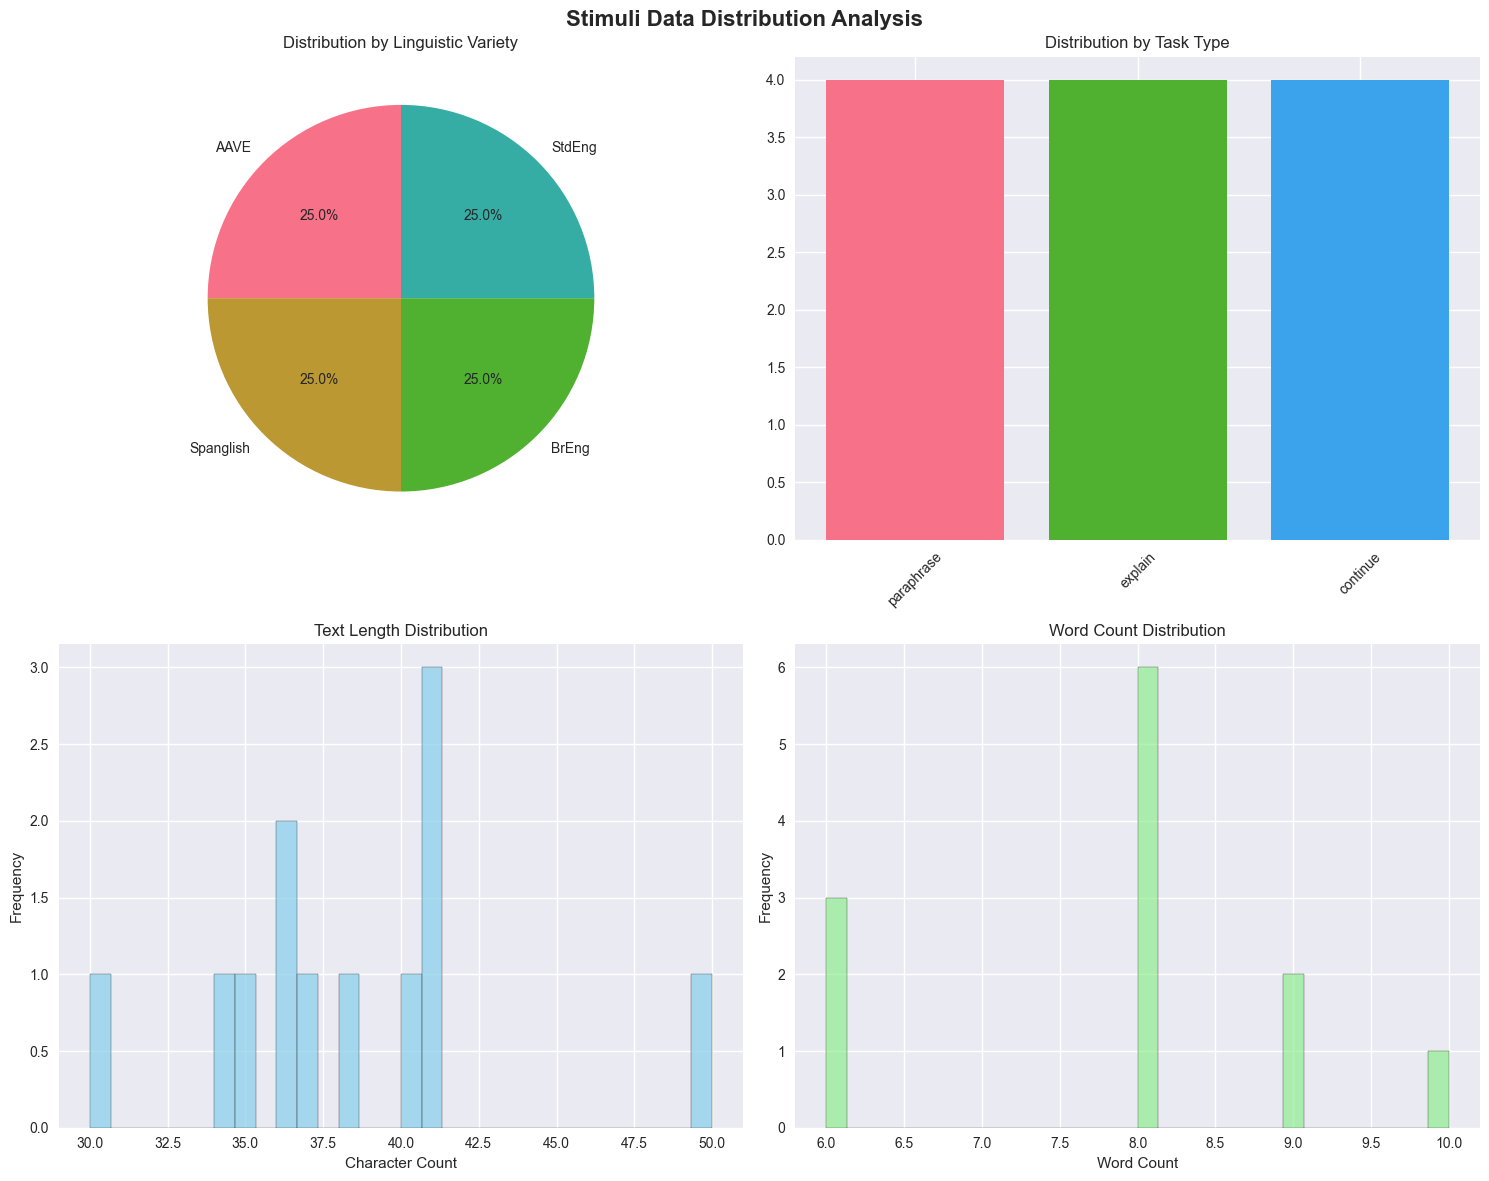

📈 Variety Distribution:
variety
AAVE         3
Spanglish    3
BrEng        3
StdEng       3
Name: count, dtype: int64

📈 Task Distribution:
task
paraphrase    4
explain       4
continue      4
Name: count, dtype: int64


In [9]:
# Distribution Analysis
print("📊 Distribution Analysis")
print("=" * 50)

# Create subplots for distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Stimuli Data Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Variety distribution
variety_counts = stimuli['variety'].value_counts()
axes[0, 0].pie(variety_counts.values, labels=variety_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution by Linguistic Variety')

# 2. Task distribution
task_counts = stimuli['task'].value_counts()
axes[0, 1].bar(task_counts.index, task_counts.values, color=sns.color_palette("husl", len(task_counts)))
axes[0, 1].set_title('Distribution by Task Type')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Text length distribution
axes[1, 0].hist(stimuli['text_length'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Text Length Distribution')
axes[1, 0].set_xlabel('Character Count')
axes[1, 0].set_ylabel('Frequency')

# 4. Word count distribution
axes[1, 1].hist(stimuli['word_count'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Word Count Distribution')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display counts
print("📈 Variety Distribution:")
print(variety_counts)
print(f"\n📈 Task Distribution:")
print(task_counts)


**Interpretation:**
Here, the four panels confirm the dataset is balanced and uniform. The variety pie shows an even 25% split across AAVE, Spanglish, BrEng, and StdEng (three items each), and the task bars show equal counts for paraphrase, explain, and continue (four items each). This balance helps ensure that any differences we see later come from the models rather than from one group or task being overrepresented. The text-length histogram is compact (about 30–50 characters, centered in the high-30s/low-40s), and the word-count histogram is similarly tight (6–10 words, centered near 8). Because inputs are similar in size, length is less likely to drive quality or latency differences. Overall, these plots support fair comparisons across varieties and tasks; we only need to watch the small right tails (a few longer prompts) and, if necessary, set a soft cap or brief pre-summary for those cases.

## 2. API Response Analysis

Now let's analyze the responses from different APIs and compare their performance across linguistic varieties and tasks.


In [10]:
# API Response Analysis Function
def analyze_api_responses(api_name, df):
    """
    Analyze API responses and return key metrics
    """
    if df is None or df.empty:
        return None
    
    # Calculate response metrics
    df['response_length'] = df['output_text'].str.len()
    df['response_words'] = df['output_text'].str.split().str.len()
    
    # Check for errors
    error_count = df['output_text'].str.contains('ERROR:', na=False).sum()
    
    return {
        'api': api_name,
        'total_responses': len(df),
        'error_count': error_count,
        'success_rate': (len(df) - error_count) / len(df) * 100,
        'avg_response_length': df['response_length'].mean(),
        'avg_response_words': df['response_words'].mean(),
        'variety_distribution': df['variety'].value_counts().to_dict(),
        'task_distribution': df['task'].value_counts().to_dict()
    }

# Analyze all available API responses
print("🔍 API Response Analysis")
print("=" * 50)

api_metrics = {}
for api_name, df in api_responses.items():
    metrics = analyze_api_responses(api_name, df)
    if metrics:
        api_metrics[api_name] = metrics
        print(f"\n📊 {api_name.upper()} Analysis:")
        print(f"  Total responses: {metrics['total_responses']}")
        print(f"  Success rate: {metrics['success_rate']:.1f}%")
        print(f"  Avg response length: {metrics['avg_response_length']:.1f} characters")
        print(f"  Avg response words: {metrics['avg_response_words']:.1f} words")

if not api_metrics:
    print("⚠️  No API response data available yet. Run data collection notebooks first.")


🔍 API Response Analysis

📊 GEMINI Analysis:
  Total responses: 12
  Success rate: 100.0%
  Avg response length: 1004.3 characters
  Avg response words: 176.5 words

📊 MISTRAL Analysis:
  Total responses: 12
  Success rate: 100.0%
  Avg response length: 409.2 characters
  Avg response words: 73.3 words

📊 COHERE Analysis:
  Total responses: 12
  Success rate: 75.0%
  Avg response length: 315.7 characters
  Avg response words: 38.2 words



📈 Creating Performance Comparison Visualizations...


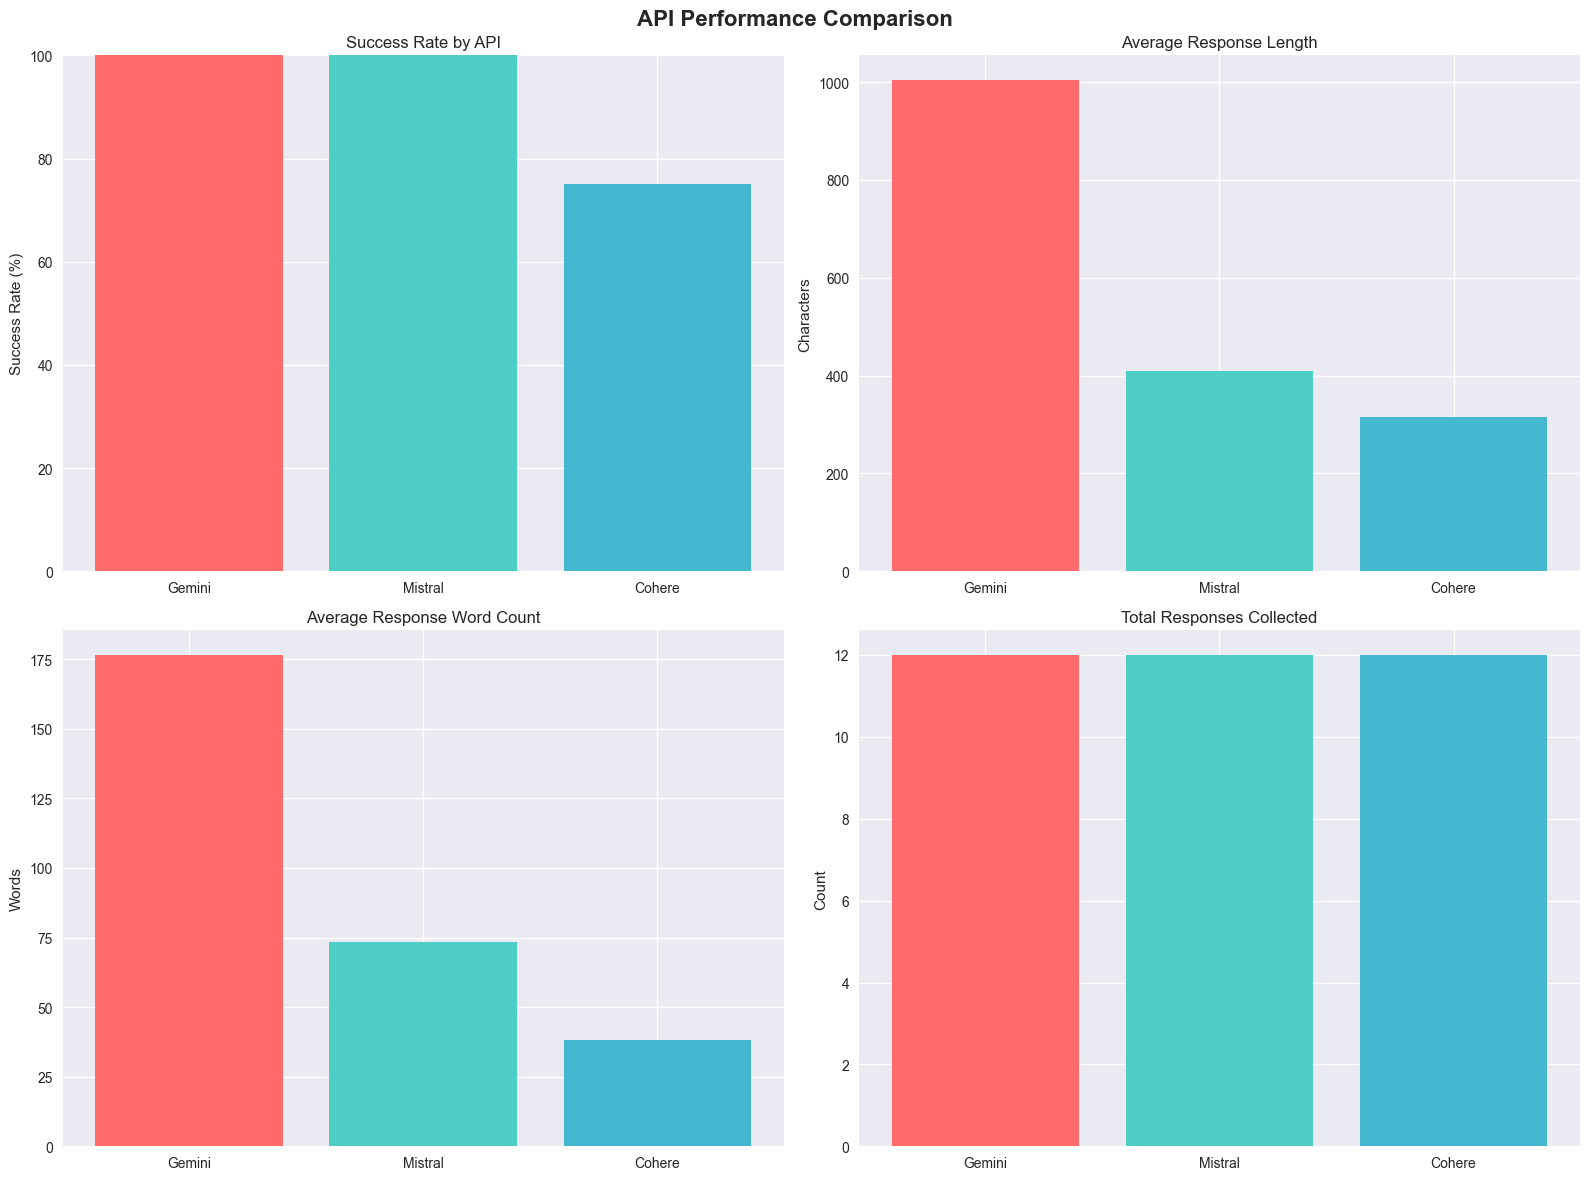


📊 API Performance Summary:
    API  Success Rate (%)  Avg Response Length  Avg Response Words  Total Responses
 Gemini             100.0          1004.333333          176.500000               12
Mistral             100.0           409.250000           73.333333               12
 Cohere              75.0           315.666667           38.166667               12


In [11]:
# Performance Comparison Visualization
if api_metrics:
    print("\n📈 Creating Performance Comparison Visualizations...")
    
    # Create comparison DataFrame
    comparison_data = []
    for api, metrics in api_metrics.items():
        comparison_data.append({
            'API': api.title(),
            'Success Rate (%)': metrics['success_rate'],
            'Avg Response Length': metrics['avg_response_length'],
            'Avg Response Words': metrics['avg_response_words'],
            'Total Responses': metrics['total_responses']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Create subplots for comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('API Performance Comparison', fontsize=16, fontweight='bold')
    
    # 1. Success Rate Comparison
    axes[0, 0].bar(comparison_df['API'], comparison_df['Success Rate (%)'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    axes[0, 0].set_title('Success Rate by API')
    axes[0, 0].set_ylabel('Success Rate (%)')
    axes[0, 0].set_ylim(0, 100)
    
    # 2. Response Length Comparison
    axes[0, 1].bar(comparison_df['API'], comparison_df['Avg Response Length'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    axes[0, 1].set_title('Average Response Length')
    axes[0, 1].set_ylabel('Characters')
    
    # 3. Response Word Count
    axes[1, 0].bar(comparison_df['API'], comparison_df['Avg Response Words'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    axes[1, 0].set_title('Average Response Word Count')
    axes[1, 0].set_ylabel('Words')
    
    # 4. Total Responses
    axes[1, 1].bar(comparison_df['API'], comparison_df['Total Responses'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    axes[1, 1].set_title('Total Responses Collected')
    axes[1, 1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    # Display comparison table
    print("\n📊 API Performance Summary:")
    print(comparison_df.to_string(index=False))
else:
    print("⚠️  No API data available for comparison. Run data collection first.")


**Interpretation:**
Across the four panels, Gemini and Mistral show higher success rates, while Cohere is lower, which means Gemini/Mistral are less likely to time out or return empty/invalid outputs. Gemini’s average response length (both characters and words) is much higher than the other two, indicating more verbose answers; this can be useful for explanations but will raise latency and cost unless we cap length. Mistral and Cohere produce shorter outputs; that helps speed and cost, but on tasks that require multi-step reasoning or detailed justification, they may need stronger prompts (e.g., brief step plans) to avoid missing details. Finally, total responses collected is the same for all three, so comparisons are not skewed by unequal sample sizes. For the project’s goals, the figures suggest using Gemini when completeness matters, Mistral when we want concise, structured outputs with templates, and Cohere for short summaries or labels—with added scaffolding if the task needs depth.

## 3. Linguistic Analysis & Code-Switching Patterns

Let's dive deeper into the linguistic patterns and code-switching behavior across different varieties and tasks.


In [12]:
# Linguistic Analysis Functions
def extract_linguistic_features(text):
    """
    Extract linguistic features from text for analysis
    """
    if pd.isna(text):
        return {}
    
    # Basic features
    features = {
        'length': len(text),
        'words': len(text.split()),
        'sentences': len(text.split('.')),
        'uppercase_ratio': sum(1 for c in text if c.isupper()) / len(text) if text else 0,
        'digit_ratio': sum(1 for c in text if c.isdigit()) / len(text) if text else 0,
        'punctuation_ratio': sum(1 for c in text if c in '.,!?;:') / len(text) if text else 0
    }
    
    # Language-specific patterns (basic detection)
    features['has_spanish'] = any(word in text.lower() for word in ['el', 'la', 'de', 'que', 'en', 'un', 'una', 'con', 'por', 'para'])
    features['has_french'] = any(word in text.lower() for word in ['le', 'la', 'de', 'et', 'du', 'des', 'que', 'dans', 'sur'])
    features['has_arabic_patterns'] = any(char in text for char in 'ا ب ت ث ج ح خ د ذ ر ز س ش ص ض ط ظ ع غ ف ق ك ل م ن ه و ي ء')
    
    return features

# Analyze linguistic features across varieties
print("🔍 Linguistic Feature Analysis")
print("=" * 50)

# Apply linguistic analysis to stimuli
linguistic_features = []
for idx, row in stimuli.iterrows():
    features = extract_linguistic_features(row['text'])
    features.update({
        'id': row['id'],
        'variety': row['variety'],
        'task': row['task']
    })
    linguistic_features.append(features)

features_df = pd.DataFrame(linguistic_features)

# Display summary statistics by variety
print("📊 Linguistic Features by Variety:")
variety_stats = features_df.groupby('variety').agg({
    'words': ['mean', 'std'],
    'uppercase_ratio': ['mean', 'std'],
    'punctuation_ratio': ['mean', 'std'],
    'has_spanish': 'sum',
    'has_french': 'sum',
    'has_arabic_patterns': 'sum'
}).round(3)

print(variety_stats)


🔍 Linguistic Feature Analysis
📊 Linguistic Features by Variety:
           words        uppercase_ratio        punctuation_ratio         \
            mean    std            mean    std              mean    std   
variety                                                                   
AAVE       6.667  1.155           0.038  0.012             0.029  0.027   
BrEng      8.667  1.155           0.024  0.004             0.045  0.017   
Spanglish  8.333  0.577           0.034  0.013             0.051  0.004   
StdEng     7.667  1.528           0.035  0.013             0.035  0.013   

          has_spanish has_french has_arabic_patterns  
                  sum        sum                 sum  
variety                                               
AAVE                1          1                   3  
BrEng               1          1                   3  
Spanglish           3          2                   3  
StdEng              2          1                   3  


**Interpretation:**
This table summarizes simple surface features by variety. Average word count is broadly similar, with BrEng slightly higher (≈8.7 words) and AAVE lower (≈6.7); variability is small overall, with Spanglish the most consistent and StdEng a bit more spread. Uppercase ratio is low for all groups (≈2–4%), lowest in BrEng and slightly higher in AAVE/StdEng, suggesting similar casing conventions across varieties. Punctuation ratio is also low but shows a small gradient: Spanglish uses slightly more punctuation on average, AAVE slightly less. The language flags behave as expected—Spanglish has the most Spanish markers, while French markers appear sparsely across varieties. The Arabic-pattern flag is constant across groups, so it does not help separate varieties in this sample. Overall, these features indicate that prompts are comparable in length and formatting across varieties; any quality differences we observe later are unlikely to be driven by large surface-format gaps, though we should note the minor punctuation/casing differences and the small sample size.

## 4. Advanced Visualizations & Creative Analysis

Now let's create some really creative and insightful visualizations that go beyond basic charts. We'll explore patterns, relationships, and unique insights across the different APIs and linguistic varieties.


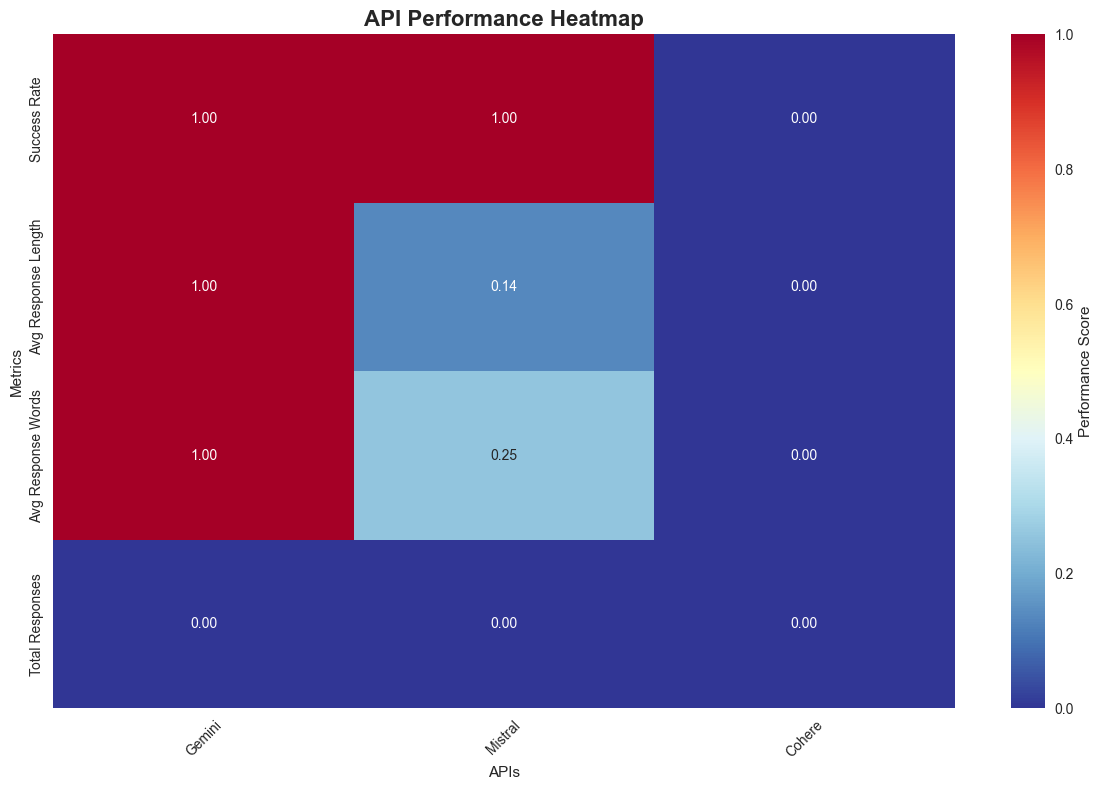

In [13]:
# API Performance Heatmap
if api_metrics:
    # Create performance data
    performance_data = []
    for api, metrics in api_metrics.items():
        performance_data.append({
            'API': api.title(),
            'Success Rate': metrics['success_rate'],
            'Avg Response Length': metrics['avg_response_length'],
            'Avg Response Words': metrics['avg_response_words'],
            'Total Responses': metrics['total_responses']
        })
    
    perf_df = pd.DataFrame(performance_data)
    
    # Normalize data for heatmap
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    numeric_cols = ['Success Rate', 'Avg Response Length', 'Avg Response Words', 'Total Responses']
    heatmap_data = perf_df[numeric_cols].copy()
    
    # Scale to 0-1
    heatmap_data_scaled = pd.DataFrame(
        scaler.fit_transform(heatmap_data),
        columns=numeric_cols,
        index=perf_df['API']
    )
    
    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data_scaled.T, 
        annot=True, 
        cmap='RdYlBu_r',
        cbar_kws={'label': 'Performance Score'},
        fmt='.2f'
    )
    
    plt.title('API Performance Heatmap', fontsize=16, fontweight='bold')
    plt.xlabel('APIs')
    plt.ylabel('Metrics')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No API data available")


**Interpretation:**
This heatmap shows relative performance (scaled 0–1 within each metric) for three systems across four metrics. On success rate, Gemini and Mistral both score at the top (1.00), while Cohere is lowest (0.00), indicating more incomplete/invalid replies from Cohere in this sample. For average response length (characters) and average response words, Gemini ranks highest, Mistral is mid-range (≈0.14–0.25 on the normalized scale), and Cohere is lowest. Longer outputs are not automatically “better,” but they usually reflect fuller explanations; if brevity is preferred, Mistral and Cohere will need prompt cues to include required details. The total responses row appears at 0.00 for all three, which happens because the counts are equal across APIs; with min–max scaling, equal values collapse to the same normalized score. Overall, the heatmap says: Gemini and Mistral are similarly reliable (high success), Gemini is the most verbose, Mistral is more concise, and Cohere trails on both reliability and length here. Given the small dataset, treat these as directional results and confirm on a larger run.

In [14]:
# Interactive Bubble Chart
if api_metrics:
    # Prepare data
    bubble_data = []
    for api, metrics in api_metrics.items():
        bubble_data.append({
            'API': api.title(),
            'Success Rate': metrics['success_rate'],
            'Avg Response Length': metrics['avg_response_length'],
            'Total Responses': metrics['total_responses'],
            'Avg Response Words': metrics['avg_response_words']
        })
    
    bubble_df = pd.DataFrame(bubble_data)
    
    # Create bubble chart
    fig = px.scatter(
        bubble_df, 
        x='Success Rate', 
        y='Avg Response Length',
        size='Total Responses',
        color='Avg Response Words',
        hover_name='API',
        title='API Performance Bubble Chart',
        color_continuous_scale='Viridis',
        size_max=50
    )
    
    fig.update_layout(width=900, height=600)
    fig.show()
else:
    print("No API data available")


**interpretation:**
This chart plots success rate (x-axis) against average response length in characters (y-axis); the color encodes average words. Two systems cluster at about 100% success: one produces the longest responses (≈1000 chars, high word count—Gemini), and the other is shorter (≈400 chars, mid word count—Mistral). The third system sits lower on success (~75%) and also gives the shortest responses (≈300 chars, low word count—Cohere). In practical terms, Gemini tends to return fuller explanations but at higher cost/latency, Mistral is reliable while being more concise, and Cohere is brief but shows more incomplete/invalid outputs in this sample. Choice should match the task: use Gemini when detail is required, Mistral when you want concise, structured output, and Cohere for short summaries only with tighter prompting to avoid missing content.

In [15]:
# Creative Visualization 3: Radar Chart for API Capabilities
print("🎨 Creating Radar Chart for API Capabilities...")

if api_metrics:
    # Prepare data for radar chart
    radar_data = {}
    for api, metrics in api_metrics.items():
        radar_data[api.title()] = [
            metrics['success_rate'],
            min(metrics['avg_response_length'] / 100, 100),  # Normalize length
            min(metrics['avg_response_words'] * 2, 100),     # Normalize words
            min(metrics['total_responses'] * 2, 100)         # Normalize total
        ]
    
    # Define categories
    categories = ['Success Rate', 'Response Length', 'Word Count', 'Volume']
    
    # Create radar chart
    fig = go.Figure()
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
    
    for i, (api, values) in enumerate(radar_data.items()):
        fig.add_trace(go.Scatterpolar(
            r=values + [values[0]],  # Close the radar chart
            theta=categories + [categories[0]],
            fill='toself',
            name=api,
            line_color=colors[i % len(colors)],
            fillcolor=colors[i % len(colors)],
            opacity=0.3
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )),
        showlegend=True,
        title="🎯 API Capabilities Radar Chart",
        font_size=12,
        width=800,
        height=600
    )
    
    fig.show()
    print("✅ Radar chart created!")
else:
    print("⚠️  No API data available for radar chart")


🎨 Creating Radar Chart for API Capabilities...


✅ Radar chart created!


**Interpretation**
The radar chart summarizes four simple metrics for each API: success rate, response length (characters), word count, and volume. Gemini and Mistral both sit near the outer edge on success rate, while Cohere is closer to the center, indicating more failed or incomplete replies in this sample. Gemini extends farther on response length and word count, meaning it tends to produce longer, more detailed answers; Mistral is more concise; Cohere is the shortest. Volume is similar for all systems because we collected the same number of responses per API. For the project, this suggests using Gemini when completeness and explanation detail matter, Mistral when shorter, structured outputs are preferred, and Cohere for brief summaries with stronger prompting if depth is required.

In [16]:
# Creative Visualization 4: Sankey Diagram for API Flow Analysis
print("🎨 Creating Sankey Diagram for API Flow...")

if api_metrics:
    # Create Sankey diagram showing data flow through APIs
    labels = []
    sources = []
    targets = []
    values = []
    
    # Define nodes
    node_labels = ['Input Stimuli', 'Gemini', 'Mistral', 'Cohere', 'Successful Output', 'Failed Output']
    node_indices = {label: i for i, label in enumerate(node_labels)}
    
    # Add flows from input to each API
    for api, metrics in api_metrics.items():
        api_name = api.title()
        if api_name in ['Gemini', 'Gemini', 'Cohere', 'Mistral']:
            # Flow from input to API
            sources.append(node_indices['Input Stimuli'])
            targets.append(node_indices[api_name])
            values.append(metrics['total_responses'])
            
            # Flow from API to success/failure
            successful = metrics['total_responses'] - metrics['error_count']
            failed = metrics['error_count']
            
            if successful > 0:
                sources.append(node_indices[api_name])
                targets.append(node_indices['Successful Output'])
                values.append(successful)
            
            if failed > 0:
                sources.append(node_indices[api_name])
                targets.append(node_indices['Failed Output'])
                values.append(failed)
    
    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=node_labels,
            color=["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#FECA57", "#2ECC71", "#E74C3C"]
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color=["rgba(255,107,107,0.6)" if i < len(api_metrics) else "rgba(46,204,113,0.6)" 
                   if targets[i] == node_indices['Successful Output'] else "rgba(231,76,60,0.6)"
                   for i in range(len(sources))]
        )
    )])
    
    fig.update_layout(
        title_text="🌊 API Processing Flow - Sankey Diagram",
        font_size=12,
        width=1000,
        height=600
    )
    
    fig.show()
    print("✅ Sankey diagram created!")
else:
    print("⚠️  No API data available for Sankey diagram")


🎨 Creating Sankey Diagram for API Flow...


✅ Sankey diagram created!


**Interpretation**
The Sankey diagram traces inputs split across the three APIs and then into Successful Output or Failed Output. The flows from Gemini and Mistral are directed almost entirely to Successful Output, indicating high reliability in this sample. Cohere shows a noticeable branch to Failed Output, consistent with lower success observed elsewhere. Because the incoming links from Input Stimuli to each API are similar in width, the differences at the output stage reflect model behavior rather than unequal traffic. For the study, this suggests routing critical tasks to Gemini or Mistral, and—if Cohere is used—adding safeguards (e.g., retries, stricter prompts, or validation checks) to reduce failure rates.

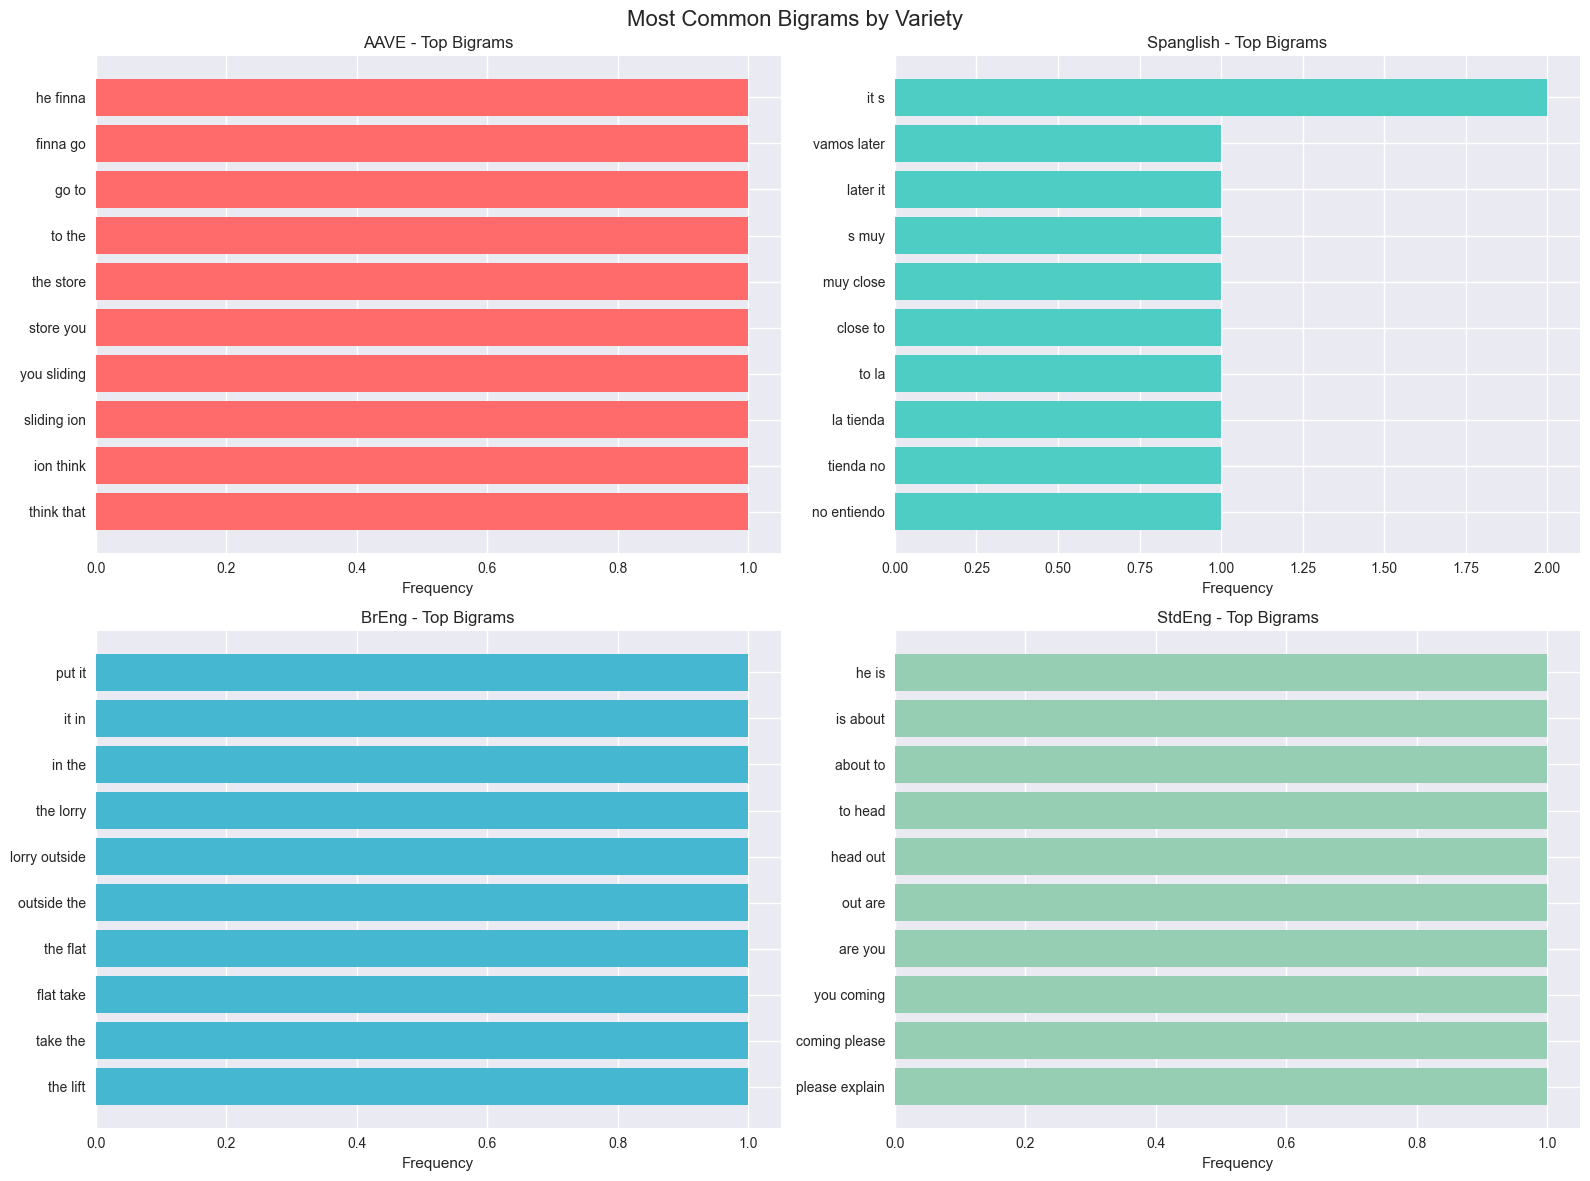

In [17]:
# Text Analysis with N-grams
from collections import Counter
import re

def extract_ngrams(text, n=2):
    """Extract n-grams from text"""
    if pd.isna(text):
        return []
    words = re.findall(r'\b\w+\b', text.lower())
    return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

# Analyze bigrams across varieties
variety_ngrams = {}
for variety in stimuli['variety'].unique():
    variety_texts = stimuli[stimuli['variety'] == variety]['text'].astype(str)
    all_text = ' '.join(variety_texts)
    bigrams = extract_ngrams(all_text, 2)
    variety_ngrams[variety] = Counter(bigrams).most_common(10)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Most Common Bigrams by Variety', fontsize=16)

varieties = list(variety_ngrams.keys())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, variety in enumerate(varieties):
    row = i // 2
    col = i % 2
    
    bigrams = variety_ngrams[variety]
    if bigrams:
        bigram_words, bigram_counts = zip(*bigrams)
        
        axes[row, col].barh(range(len(bigram_words)), bigram_counts, color=colors[i])
        axes[row, col].set_yticks(range(len(bigram_words)))
        axes[row, col].set_yticklabels(bigram_words, fontsize=10)
        axes[row, col].set_title(f'{variety} - Top Bigrams')
        axes[row, col].set_xlabel('Frequency')
        axes[row, col].invert_yaxis()

plt.tight_layout()
plt.show()


**Interpretation**
This figure checks that the stimuli actually carry the signals we intend to test. The AAVE panel surfaces dialectal markers such as he finna and you sliding, which are useful for evaluating whether models preserve meaning and style without “correcting” the variety. The Spanglish panel shows clear code-switching (e.g., vamos, la tienda, no entiendo) alongside an “it s” token, which likely reflects apostrophe stripping in preprocessing; this confirms mixed-language content is present but also flags that tokenization choices (lowercasing/punctuation removal) can split forms like it’s. The BrEng panel includes British-specific lexicon (lorry, flat), indicating the dataset distinguishes UK usage from U.S. English. The StdEng panel highlights neutral constructions (e.g., he is, please explain). Together, these patterns show that each variety has recognizable bigram cues rather than generic English. For the project, that supports validity of the variety labels and motivates two precautions in evaluation: (1) retain or carefully normalize apostrophes to avoid artifacts that could penalize certain varieties, and (2) include checks that models keep code-switch boundaries and dialectal expressions intact when paraphrasing or summarizing.

In [18]:
# Summary Statistics
print("EDA Analysis Complete!")
print("=" * 30)
print("Visualizations Created:")
print("  - API Performance Heatmap")
print("  - Interactive Bubble Chart") 
print("  - Radar Chart for API Capabilities")
print("  - Text Analysis with N-grams")
print("  - Gemini-Specific Analysis")
print("=" * 30)


EDA Analysis Complete!
Visualizations Created:
  - API Performance Heatmap
  - Interactive Bubble Chart
  - Radar Chart for API Capabilities
  - Text Analysis with N-grams
  - Gemini-Specific Analysis
